In [1]:
import nibabel as nb 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Functional_Fusion.reliability import decompose_subj_group
import Functional_Fusion.util as ut
from scipy.stats import ttest_1samp

from scripts import decomposing_variances
from scripts import make_atlas
#from scripts import bold_normalization 
import Functional_Fusion.dataset as ds
import Functional_Fusion.atlas_map as am

/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_34622/2684524075.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [70]:
#loading prewhitened betas (form subjects x repetitions x conditions x voxels)

wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group'

dentate_mdtb = np.load(wk_dir + '/MDTB_ses2_dentate.npy')
cereb_gray_mdtb = np.load(wk_dir + '/MDTB_ses2_cereb_gray.npy')
thalamus_mdtb = np.load(wk_dir + '/MDTB_ses2_thalamus.npy')
redn_mdtb = np.load(wk_dir + '/MDTB_ses2_redn.npy')
olive_mdtb = np.load(wk_dir + '/MDTB_ses2_olive.npy')
pontine_mdtb = np.load(wk_dir + '/MDTB_ses2_pontine.npy')



In [76]:
#data into .tsv files

data = olive_mdtb

data = np.nan_to_num(data)

n_subj, n_runs, n_conds, n_vox = data.shape

reshaped_data = data.reshape(n_subj, n_runs * n_conds, n_vox)   

cond_vec = np.tile(np.arange(1,33),16)

part_vec = np.repeat(np.arange(1,17), 32)

var_decomp = decompose_subj_group(reshaped_data, cond_vec, part_vec, separate = 'subject_wise', subtract_mean=False)

print(reshaped_data.shape)

var_norm = np.zeros((24,3))

for i in range(24): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

ff_base ='/Volumes/diedrichsen_data$/data/FunctionalFusion/MDTB'

tsv_file = pd.read_csv("var_decomp_new.tsv", sep="\t")

df_lang = pd.DataFrame(var_norm, columns=["group", "individual", "noise"])

T = pd.read_csv(f'{ff_base}/participants.tsv', sep = '\t')

subj = [i for i in T.participant_id]

df_lang["subj_id"] = subj  
df_lang["dataset"] = "MDTB_ses2"  
df_lang["atlas"] = "MNISymOlive1"  # You can modify this as well

# Save as .tsv file (tab-separated)
df_lang.to_csv("var_decomp_new.tsv", sep="\t", mode = 'a', index=False, header=False)



(24, 512, 1448)
[[ 1.94048729e-03  4.22112531e-03  9.93838387e-01]
 [ 3.17336365e-03 -3.40222468e-05  9.96860659e-01]
 [ 2.04763911e-03  9.10413647e-05  9.97861320e-01]
 [ 1.73997931e-03 -7.63070729e-03  1.00589073e+00]
 [ 8.60322361e-04  1.46005224e-02  9.84539155e-01]
 [ 1.65779166e-03  7.27457611e-03  9.91067632e-01]
 [ 2.78796420e-03  7.32557253e-03  9.89886463e-01]
 [ 2.02888449e-03  3.96781446e-03  9.94003301e-01]
 [ 1.85217638e-03 -5.85098692e-04  9.98732922e-01]
 [ 1.13869444e-03 -3.95518248e-03  1.00281649e+00]
 [ 3.25630465e-03 -9.48759431e-05  9.96838571e-01]
 [ 1.08530831e-03  8.88834313e-03  9.90026349e-01]
 [ 3.63978402e-03  9.19225142e-03  9.87167965e-01]
 [ 2.23639555e-03  1.20557941e-02  9.85707810e-01]
 [ 1.63441430e-03  9.74338483e-03  9.88622201e-01]
 [ 2.49798341e-03 -1.08810279e-03  9.98590119e-01]
 [ 1.83915710e-03 -6.02580545e-03  1.00418665e+00]
 [ 2.07427879e-03  3.20187933e-03  9.94723842e-01]
 [ 2.07324973e-03  8.77638067e-03  9.89150370e-01]
 [ 4.30237142e-

In [78]:
D = pd.read_csv('var_decomp_new.tsv',sep='\t')
D['within']=D.group+D.individual
# Rearrange dataframe into long format for easier plotting
T= D.melt(id_vars=['dataset','atlas','subj_id'],value_vars=['group','within'],var_name='vartype',value_name='variance')

In [79]:
# Set Figure style to talk on black background

rc = {'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}
sns.set_style(rc=rc)

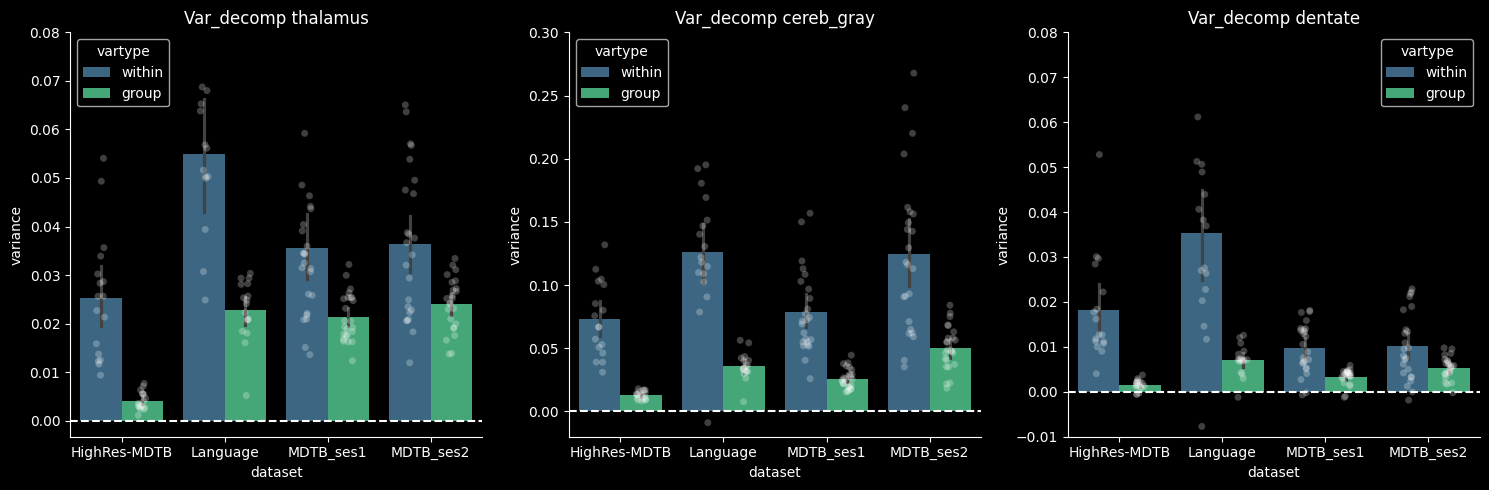

In [90]:
pal = [[1,1,1], [1,1,1]]
plt.figure(figsize=(15, 5)) 

# Thalamus
plt.subplot(1, 3, 1)
X = T[T.atlas == 'MNISymThalamus1']
ax = sns.barplot(data=X, x='dataset', y='variance', hue='vartype',
                 order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
                 hue_order=['within', 'group'], palette='viridis')
sns.stripplot(data=X, x='dataset', y='variance', hue='vartype',
              order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
              hue_order=['within', 'group'], palette=pal, alpha=0.25, jitter=0.1,
              dodge=True, legend=False)
ax.axhline(0, color='white', linestyle='--')
ax.set_ylim(-0.0033, 0.08)
ax.set_title("Var_decomp thalamus")

# Cerebellar Gray
plt.subplot(1, 3, 2)
X = T[T.atlas == 'MNISymCereb2']
ax = sns.barplot(data=X, x='dataset', y='variance', hue='vartype',
                 order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
                 hue_order=['within', 'group'], palette='viridis')
sns.stripplot(data=X, x='dataset', y='variance', hue='vartype',
              order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
              hue_order=['within', 'group'], palette=pal, alpha=0.25, jitter=0.1,
              dodge=True, legend=False)
plt.axhline(0, color='white', linestyle='--')
ax.set_ylim(-0.02, 0.3)
ax.set_title("Var_decomp cereb_gray")

# Dentate Nucleus (example third plot)
plt.subplot(1, 3, 3)
X = T[T.atlas == 'MNISymDentate1']  # Change this to match your dentate label
ax = sns.barplot(data=X, x='dataset', y='variance', hue='vartype',
                 order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
                 hue_order=['within', 'group'], palette='viridis')
sns.stripplot(data=X, x='dataset', y='variance', hue='vartype',
              order=['HighRes-MDTB', 'Language', 'MDTB_ses1', 'MDTB_ses2'],
              hue_order=['within', 'group'], palette=pal, alpha=0.25, jitter=0.1,
              dodge=True, legend=False)
plt.axhline(0, color='white', linestyle='--')
ax.set_ylim(-0.01, 0.08)  # Adjust as needed
ax.set_title("Var_decomp dentate")

plt.tight_layout()
plt.show()



#recall that the height of the bars is the MEAN of the subject group + individual values in the .tsv file


In [84]:
datasets = T['dataset'].unique()
atlases = T['atlas'].unique()
vartypes = ['within', 'group']

# Store results
print("=== One-sample t-tests against zero ===")
for atlas in atlases:
    print(f"\nAtlas: {atlas}")
    for ds in datasets:
        for vt in vartypes:
            # Get data for that combo
            data = T[(T['dataset'] == ds) & (T['vartype'] == vt) & (T['atlas'] == atlas)]['variance'].values
            if len(data) > 0:
                t_stat, p_val = ttest_1samp(data, 0)
                mean = data.mean()
                print(f"{ds} | {vt:6s} | mean = {mean:.4f}, t = {t_stat:.3f}, p = {p_val:.4e}, n = {len(data)}")


=== One-sample t-tests against zero ===

Atlas: MNISymDentate1
Language | within | mean = 0.0354, t = 6.689, p = 5.1987e-06, n = 17
Language | group  | mean = 0.0070, t = 8.675, p = 1.9093e-07, n = 17
HighRes-MDTB | within | mean = 0.0182, t = 6.383, p = 9.0681e-06, n = 17
HighRes-MDTB | group  | mean = 0.0015, t = 5.285, p = 7.4004e-05, n = 17
MDTB_ses1 | within | mean = 0.0097, t = 8.594, p = 1.2294e-08, n = 24
MDTB_ses1 | group  | mean = 0.0034, t = 9.579, p = 1.7118e-09, n = 24
MDTB_ses2 | within | mean = 0.0101, t = 6.519, p = 1.1884e-06, n = 24
MDTB_ses2 | group  | mean = 0.0053, t = 10.382, p = 3.7496e-10, n = 24

Atlas: MNISymCereb2
Language | within | mean = 0.1261, t = 10.623, p = 1.1770e-08, n = 17
Language | group  | mean = 0.0358, t = 13.615, p = 3.2348e-10, n = 17
HighRes-MDTB | within | mean = 0.0732, t = 10.234, p = 1.9877e-08, n = 17
HighRes-MDTB | group  | mean = 0.0130, t = 16.706, p = 1.5043e-11, n = 17
MDTB_ses1 | within | mean = 0.0788, t = 11.752, p = 3.3512e-11,